# Practical Machine Learning                                                                             
# Lab 1

## Exercises

### 1.[Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/images.zip), we have 8 images, read the images, flatten them, then store them in a numpy array. Before storing the images divide them by 255.
The numpy array should have the dimension equals to (8, 12288), in order to check the dimension use the $shape$ attribute.

In [33]:
import os
import cv2 as cv
import numpy as np 
import glob

from google.colab import drive
drive.mount('/content/gdrive')

directory = '/content/gdrive/MyDrive/IA/lab1/images'

X_input = []

# assign director
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    image = cv.imread(f).flatten() / 255.0
    X_input.append(image)

X_input = np.asarray(X_input)
print(X_input.shape)


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
(8, 12288)


### 2. Compute the mean of the images. 

In [34]:
mean = X_input.mean(axis=(0,1))
print(mean)

0.44135853885825166


### 3. Normalize the images by subtracting the mean from each image.

In [35]:
X = X_input - mean

### 4. [Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/weights.zip), we have the weights and the bias for a perceptron that classifies the images in 4 classes. Use the weights (use np.load(‘path’) to load the weights) and the images (after normalization) to compute (y_hat) the predictions of the perceptron.  
  $$ y_{hat} = softmax(X * W + b) $$
  $$ X - input, W - weights, b - bias $$
  $$Softmax(z_i)=\frac{e^{z_i}}{\sum_{j=1}^{j=K} e^{z_j} }$$

In [36]:
path_weights = '/content/gdrive/MyDrive/IA/lab1/coefs.npy'
weights = np.load(path_weights)

path_bias = '/content/gdrive/MyDrive/IA/lab1/bias.npy'
bias = np.load(path_bias)

Z = np.dot(X, weights) + bias

softmax_Z = []
for z in Z:
  softmax_calc_z = np.exp(z)/np.exp(z).sum()
  softmax_Z.append(softmax_calc_z)

softmax_Z = np.asarray(softmax_Z)

### 5. Let the ground-truth labels be y = [0, 0, 1, 1, 2,  2, 3,  3]. Compute the accuracy of the classifier (define a new function accuracy_score). 
$$Accuracy = \frac{1}{n} \sum_{i=1}^{j=n} y_{pred}^i == y_{true}^i$$

In [37]:
def accuracy_score(y_pred, y_true):
  return (y_pred == y_true).sum()

### 6. The labels of the classes are: (Cat - 0,  Dog - 1, Frog - 2,  Horse - 3), print the label for each prediction (use a dictionary). 


In [38]:
dict_class = {0:'Cat', 1:'Dog', 2:'Frog', 3:'Horse'}

predictions = np.argmax(softmax_Z, axis=(1))
for prediction in predictions:
  print(dict_class[prediction])

Horse
Frog
Cat
Cat
Horse
Dog
Frog
Dog


### 7. Display the mean image (use imshow from Matplotlib).
#### Don’t forget to multiply the image by 255, then convert the image to uint8.

(64, 64, 3)


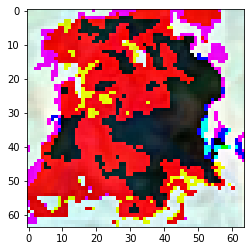

In [39]:
mean_image = np.mean(X, axis=(0))
mean_image = np.reshape(mean_image, (64, 64, 3))
mean_image = mean_image * 255.0
print(mean_image.shape)

import matplotlib.pyplot as plt
plt.imshow(np.uint8(mean_image))
plt.show()